In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data=pd.read_csv('constructure-world-championship.csv')

In [3]:
data.head()

,Season,Constructor,Class
0,2021,Yamaha,MotoGP™
1,2021,Kalex,Moto2™
2,2021,KTM,Moto3™
3,2021,Energica,MotoE™
4,2020,Suzuki,MotoGP™


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       284 non-null    int64 
 1   Constructor  284 non-null    object
 2   Class        284 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.8+ KB


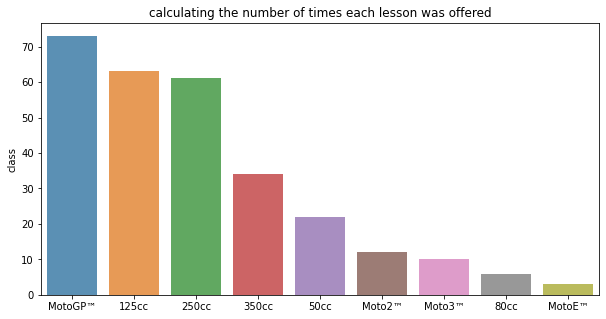

In [5]:
class_count=data['Class'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=class_count.index,y=class_count.values[:20],alpha=0.8)
plt.title('calculating the number of times each lesson was offered')
plt.ylabel("class")
plt.show()

In [6]:
# total constructors
constructors=data['Constructor'].value_counts()
print(constructors,"\nTotal is",len(constructors))

Honda                65
Yamaha               38
MV Agusta            35
Aprilia              18
Suzuki               16
Derbi                11
Kalex                10
Kawasaki              9
Moto Guzzi            8
Gilera                8
Garelli               6
Kreidler              6
NSU                   5
KTM                   5
Mondial               5
Harley Davidson       4
Morbidelli            4
Bultaco               3
Norton                3
Benelli               3
Energica              3
Krauser               2
Velocette             2
Minarelli             2
MBA                   2
Van Veen-Kreidler     1
JJ Cobas              1
Ducati                1
Kreidler Van Veen     1
Bimota-Yamaha         1
Motul Bultaco         1
Suter                 1
Moriwaki              1
Zundapp               1
Chevallier            1
AJS                   1
Name: Constructor, dtype: int64 
Total is 36


# Japan's Honda and Yamaha are the top two manufacturers, and Italy's MV Augusta is third.

### The amount of constructor championships each nation has won will now be determined.

In [7]:
italian = ['Energica', 'Aprilia', 'Derbi', 'Gilera', 'Ducati', 
           'Garelli', 'Minarelli', 'MBA', 'Bimota-Yamaha', 'Morbidelli', 
           'MV Agusta', 'Benelli', 'Mondial', 'Moto Guzzi']

japanese = ['Yamaha', 'Suzuki', 'Honda', 'Moriwaki', 'Kawasaki']

german = ['Kalex', 'Krauser', 'Zundapp', 'Kreidler']

In [8]:


nation = []
for i, row in data.iterrows():
    if row["Constructor"] in italian:
        nation.append("Italian")
    elif row["Constructor"] in japanese:
        nation.append("Japanese")
    elif row["Constructor"] in german:
        nation.append("German")
    else:
        nation.append("Other")

data["Nation"] = nation




<AxesSubplot:title={'center':'Number of championship wins by country'}, xlabel='Country', ylabel='Number of wins'>

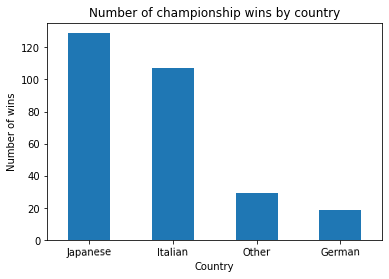

In [9]:
nation_wins = data["Nation"].value_counts()

nation_wins.plot(kind='bar', rot = 1,
                xlabel = "Country", ylabel = "Number of wins",
                title = "Number of championship wins by country")

In [10]:
print(nation_wins)

Japanese    129
Italian     107
Other        29
German       19
Name: Nation, dtype: int64


# In the constructor championships, the Japanese came out on top, followed by the Italians and the Germans.

In [11]:
df_by_class=data.groupby(by=['Class','Nation'])['Season'].count()


In [12]:
n_editon=df_by_class.unstack().sum(axis=1)

In [13]:
df_by_class_pct=df_by_class/n_editon
df_by_class_pct

Class    Nation  
125cc    Italian     0.603175
         Japanese    0.349206
         Other       0.047619
250cc    Italian     0.344262
         Japanese    0.540984
         Other       0.114754
350cc    Italian     0.470588
         Japanese    0.382353
         Other       0.147059
50cc     German      0.318182
         Italian     0.090909
         Japanese    0.318182
         Other       0.272727
80cc     German      0.333333
         Italian     0.666667
Moto2™   German      0.833333
         Japanese    0.083333
         Other       0.083333
Moto3™   Japanese    0.500000
         Other       0.500000
MotoE™   Italian     1.000000
MotoGP™  Italian     0.315068
         Japanese    0.657534
         Other       0.027397
dtype: float64

<AxesSubplot:title={'center':'Number of wins in each category by each nations'}, xlabel='Class', ylabel='Number  of Championships'>

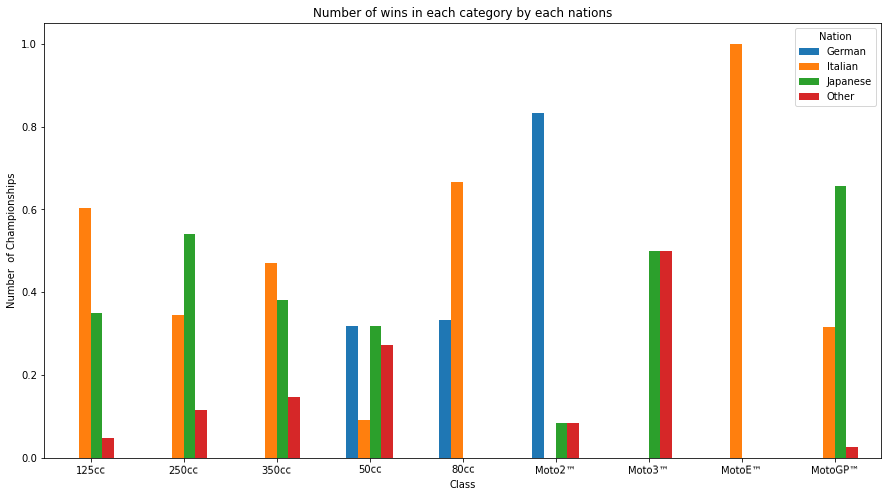

In [14]:

df_by_class_pct.unstack().plot(kind="bar",legend=True,figsize=(15,8),
                              rot=1,ylabel="Number  of Championships",
                              title="Number of wins in each category by each nations")

Counting the number of titles each country has claimed in the various divisions

In [15]:
df_by_nations=data.groupby(['Nation','Class'])['Season'].count()
df_by_nations

Nation    Class  
German    50cc        7
          80cc        2
          Moto2™     10
Italian   125cc      38
          250cc      21
          350cc      16
          50cc        2
          80cc        4
          MotoE™      3
          MotoGP™    23
Japanese  125cc      22
          250cc      33
          350cc      13
          50cc        7
          Moto2™      1
          Moto3™      5
          MotoGP™    48
Other     125cc       3
          250cc       7
          350cc       5
          50cc        6
          Moto2™      1
          Moto3™      5
          MotoGP™     2
Name: Season, dtype: int64

In [16]:
n_wins_by_nation=df_by_nations.unstack().sum(axis=1)
n_wins_by_nation

Nation
German       19.0
Italian     107.0
Japanese    129.0
Other        29.0
dtype: float64

In [17]:
df_by_nation_pct=df_by_nations/n_wins_by_nation
df_by_nation_pct

Nation    Class  
German    50cc       0.368421
          80cc       0.105263
          Moto2™     0.526316
Italian   125cc      0.355140
          250cc      0.196262
          350cc      0.149533
          50cc       0.018692
          80cc       0.037383
          MotoE™     0.028037
          MotoGP™    0.214953
Japanese  125cc      0.170543
          250cc      0.255814
          350cc      0.100775
          50cc       0.054264
          Moto2™     0.007752
          Moto3™     0.038760
          MotoGP™    0.372093
Other     125cc      0.103448
          250cc      0.241379
          350cc      0.172414
          50cc       0.206897
          Moto2™     0.034483
          Moto3™     0.172414
          MotoGP™    0.068966
dtype: float64

<AxesSubplot:title={'center':'Distribution of Championships for each nation'}, xlabel='Nation', ylabel='Number of Championship won'>

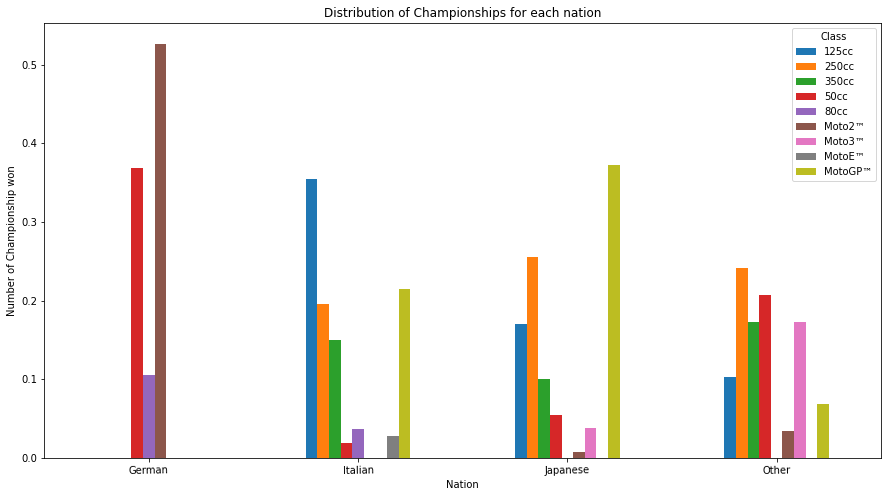

In [18]:
df_by_nation_pct.unstack().plot(kind="bar",figsize=(15,8),
                                xlabel="Nation",ylabel="Number of Championship won",
                                title="Distribution of Championships for each nation",
                                rot=1)

In [19]:
italian_wins=df_by_nations[3:10]
totalWins=sum(italian_wins)

print("Category","% of total wins")
for key ,val in italian_wins.iteritems():
    print(key[1],round(val/totalWins,2)*100)

Category % of total wins
125cc 36.0
250cc 20.0
350cc 15.0
50cc 2.0
80cc 4.0
MotoE™ 3.0
MotoGP™ 21.0


<AxesSubplot:title={'center':'Distribution of wins of italian manufacturers'}, ylabel=' '>

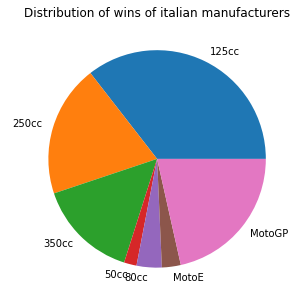

In [20]:
labels = ["125cc", "250cc", "350cc", "50cc", "80cc", "MotoE", "MotoGP"]
italian_wins.plot(kind="pie",figsize=(10,5),ylabel=" ",labels=labels, title="Distribution of wins of italian manufacturers")